<a href="https://colab.research.google.com/github/VictorGFL/CursodeExtens-opythonpandas/blob/main/Segundo_exemplo_em_Python_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Segundo exemplo de manipulação de dados usando Python Pandas Veremos inserção de dados, remoção de colunas, merge, gráficos**

AUTOR: VICTOR GABRIEL FERREIRA LEITE

DATA: 09/02/2023

In [2]:
#Importando biblioteca pandas
import pandas as pd

In [3]:
#Definindo um date frame e averiguando se ele está ok
combustíveis_df = pd.read_excel("ca-2021-02.xlsx")
display(combustíveis_df.head())

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,GASOLINA,2021-11-01,6.799,NaN,R$ / litro,VIBRA ENERGIA
1,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,ETANOL,2021-11-01,5.299,NaN,R$ / litro,VIBRA ENERGIA
2,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,DIESEL,2021-11-01,5.549,NaN,R$ / litro,VIBRA ENERGIA
3,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,GASOLINA ADITIVADA,2021-11-01,6.899,NaN,R$ / litro,VIBRA ENERGIA
4,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,DIESEL S10,2021-11-01,5.649,NaN,R$ / litro,VIBRA ENERGIA


In [4]:
#Inserção simples de dados
combustíveis_df ['Ativo'] = True
display(combustíveis_df.head())

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira,Ativo
0,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,GASOLINA,2021-11-01,6.799,NaN,R$ / litro,VIBRA ENERGIA,True
1,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,ETANOL,2021-11-01,5.299,NaN,R$ / litro,VIBRA ENERGIA,True
2,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,DIESEL,2021-11-01,5.549,NaN,R$ / litro,VIBRA ENERGIA,True
3,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,GASOLINA ADITIVADA,2021-11-01,6.899,NaN,R$ / litro,VIBRA ENERGIA,True
4,NE,AL,ARAPIRACA,POSTO ARAPIRACA LTDA,12.451.076/0004-65,RODOVIA AL 220,105,KM 68,CANAFISTULA,57302-605,DIESEL S10,2021-11-01,5.649,NaN,R$ / litro,VIBRA ENERGIA,True


In [5]:
# Criar uma coluna "Obs" que tenha nela escrito "MELHOR CIDADE" quando a coluna Municipio for igual a SAO PAULO
combustíveis_df['Obs'] = ["MELHOR CIDADE" if municipio == 'SAO PAULO' else "-" for municipio in combustíveis_df['Municipio']]
display(combustíveis_df.loc[combustíveis_df['Municipio'].isin(['SAO PAULO','INDAIATUBA', 'CAMPINAS', 'SALTO']), ['Municipio', 'Obs']])


,Municipio,Obs
1601,SAO PAULO,MELHOR CIDADE
1602,SAO PAULO,MELHOR CIDADE
1603,SAO PAULO,MELHOR CIDADE
1604,SAO PAULO,MELHOR CIDADE
2607,CAMPINAS,-
...,...,...
165925,SAO PAULO,MELHOR CIDADE
165926,SAO PAULO,MELHOR CIDADE
166122,SAO PAULO,MELHOR CIDADE
166123,SAO PAULO,MELHOR CIDADE


#Outra maneira:
combustiveis_df['Obs'] = ['MELHOR CIDADE' if municipio == 'SAO PAULO' else '' for municipio in combustiveis_df['Municipio']]

In [6]:
#Preenchimento com condicional
import numpy as np
combustíveis_df['Valor de Venda - Status'] = np.where(combustíveis_df['Valor de Venda'] > 6.5, 'Caro', 'Barato')
display(combustíveis_df[['Revenda', 'Valor de Venda', 'Valor de Venda - Status']])

,Revenda,Valor de Venda,Valor de Venda - Status
0,POSTO ARAPIRACA LTDA,6.799,Caro
1,POSTO ARAPIRACA LTDA,5.299,Barato
2,POSTO ARAPIRACA LTDA,5.549,Barato
3,POSTO ARAPIRACA LTDA,6.899,Caro
4,POSTO ARAPIRACA LTDA,5.649,Barato
...,...,...,...
168404,COMERCIAL DE COMBUSTIVEL CACHOEIRINHA LTDA,5.859,Barato
168405,ABC DISTRIBUICAO DE PETROLEO LTDA,6.580,Caro
168406,ABC DISTRIBUICAO DE PETROLEO LTDA,4.740,Barato
168407,ABC DISTRIBUICAO DE PETROLEO LTDA,5.448,Barato


#Com duas condicionais usando ternario clássico
combustíveis_df['Obs'] = ["NAO COMPRAR" if munic == "Caro" else "COMPRAR" for munic in combustíveis_df["Status do Valor de Venda"]]
display(combustíveis_df.loc[combustíveis_df['Municipio'].isin(['SAO PAULO','INDAIATUBA', 'CAMPINAS', 'SALTO']), ['Municipio', 'Status do Valor de Venda', 'Obs']])

In [7]:
#Calcular número de postos por habitantes nessa amostragem
num_habitantes_df = pd.read_csv("ibge_num_habitantes_estimado.csv", sep=";")
num_habitantes_df.rename(columns={"Estado":"Estado - Sigla"}, inplace=True)
display(num_habitantes_df)

,Municipio,Estado - Sigla,NumHabitantes2021
0,BELO HORIZONTE,MG,2530701
1,CAMPINAS,SP,1223237
2,CAMPO GRANDE,MS,916001
3,CURITIBA,PR,1963726
4,GOIANIA,GO,1555626
5,INDAIATUBA,SP,260690
6,NATAL,RN,803739
7,PALMAS,TO,313349
8,PENAPOLIS,SP,64098
9,PORTO ALEGRE,RS,1492530


In [8]:
#Merge (Mesclagem) dos df's
colunas = ['Municipio', 'Estado - Sigla']
merge_df = combustíveis_df.merge(num_habitantes_df, how="inner", on=colunas)
display(merge_df)
print(merge_df.info())

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira,Ativo,Obs,Valor de Venda - Status,NumHabitantes2021
0,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854,QUADRA08 LOTE 11E,SETOR NEGRAO DE LIMA,74650-300,GASOLINA,2021-11-01,6.999,NaN,R$ / litro,RAIZEN,True,-,Caro,1555626
1,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854,QUADRA08 LOTE 11E,SETOR NEGRAO DE LIMA,74650-300,ETANOL,2021-11-01,4.990,NaN,R$ / litro,RAIZEN,True,-,Barato,1555626
2,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854,QUADRA08 LOTE 11E,SETOR NEGRAO DE LIMA,74650-300,GASOLINA ADITIVADA,2021-11-01,7.130,NaN,R$ / litro,RAIZEN,True,-,Caro,1555626
3,CO,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,AVENIDA INDEPENDENCIA,2.908,NaN,VILA NOVA,74645-010,GASOLINA,2021-11-01,6.990,NaN,R$ / litro,BRANCA,True,-,Caro,1555626
4,CO,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,AVENIDA INDEPENDENCIA,2.908,NaN,VILA NOVA,74645-010,ETANOL,2021-11-01,4.990,NaN,R$ / litro,BRANCA,True,-,Barato,1555626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20629,SE,SP,INDAIATUBA,POSTO DOS ESTEVES LTDA,20.763.169/0001-00,AVENIDA ITORORO,160,NaN,CENTRO,13330-055,GASOLINA,2021-12-28,6.499,NaN,R$ / litro,IPIRANGA,True,-,Barato,260690
20630,SE,SP,INDAIATUBA,ABDELNOR VI COMERCIO DE COMBUSTIVEIS LTDA,30.253.289/0001-11,AVENIDA PRESIDENTE KENNEDY,496,NaN,CIDADE NOVA I,13334-170,DIESEL S10,2021-12-28,5.499,NaN,R$ / litro,RAIZEN,True,-,Barato,260690
20631,SE,SP,INDAIATUBA,ABDELNOR VI COMERCIO DE COMBUSTIVEIS LTDA,30.253.289/0001-11,AVENIDA PRESIDENTE KENNEDY,496,NaN,CIDADE NOVA I,13334-170,GASOLINA ADITIVADA,2021-12-28,6.699,NaN,R$ / litro,RAIZEN,True,-,Caro,260690
20632,SE,SP,INDAIATUBA,ABDELNOR VI COMERCIO DE COMBUSTIVEIS LTDA,30.253.289/0001-11,AVENIDA PRESIDENTE KENNEDY,496,NaN,CIDADE NOVA I,13334-170,ETANOL,2021-12-28,4.899,NaN,R$ / litro,RAIZEN,True,-,Barato,260690


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20634 entries, 0 to 20633
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Regiao - Sigla           20634 non-null  object        
 1   Estado - Sigla           20634 non-null  object        
 2   Municipio                20634 non-null  object        
 3   Revenda                  20634 non-null  object        
 4   CNPJ da Revenda          20634 non-null  object        
 5   Nome da Rua              20634 non-null  object        
 6   Numero Rua               20634 non-null  object        
 7   Complemento              3837 non-null   object        
 8   Bairro                   20634 non-null  object        
 9   Cep                      20634 non-null  object        
 10  Produto                  20634 non-null  object        
 11  Data da Coleta           20634 non-null  datetime64[ns]
 12  Valor de Venda           20634 n

In [9]:
#Destruir coluna vazia
merge_df.dropna(axis='columns', inplace=True)
print(merge_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20634 entries, 0 to 20633
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Regiao - Sigla           20634 non-null  object        
 1   Estado - Sigla           20634 non-null  object        
 2   Municipio                20634 non-null  object        
 3   Revenda                  20634 non-null  object        
 4   CNPJ da Revenda          20634 non-null  object        
 5   Nome da Rua              20634 non-null  object        
 6   Numero Rua               20634 non-null  object        
 7   Bairro                   20634 non-null  object        
 8   Cep                      20634 non-null  object        
 9   Produto                  20634 non-null  object        
 10  Data da Coleta           20634 non-null  datetime64[ns]
 11  Valor de Venda           20634 non-null  float64       
 12  Unidade de Medida        20634 n

In [10]:
#Selecionando outras colunas para derrubar
colunas= ['Regiao - Sigla', 'Nome da Rua', 'Numero Rua', 
         'Bairro', 'Cep', 'Produto', 'Data da Coleta', 'Valor de Venda',
         'Unidade de Medida', 'Bandeira', 'Ativo', 'Valor de Venda - Status']
merge_df.drop(labels=colunas, axis=1, inplace = True)
print(merge_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20634 entries, 0 to 20633
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Estado - Sigla     20634 non-null  object
 1   Municipio          20634 non-null  object
 2   Revenda            20634 non-null  object
 3   CNPJ da Revenda    20634 non-null  object
 4   Obs                20634 non-null  object
 5   NumHabitantes2021  20634 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.1+ MB
None


In [11]:
# Remover a linhas duplicadas
merge_df.drop_duplicates(inplace=True)
display(merge_df.head(100))

,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Obs,NumHabitantes2021
0,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,-,1555626
3,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,-,1555626
7,GO,GOIANIA,POSTO DN LTDA,05.413.136/0001-47,-,1555626
11,GO,GOIANIA,POSTO ALDEIA LTDA,04.896.662/0001-42,-,1555626
15,GO,GOIANIA,AUTO POSTO SANTA LUZIA LTDA,04.142.631/0001-04,-,1555626
...,...,...,...,...,...,...
1677,RJ,RIO DE JANEIRO,POSTO SANTA CLARA DA PAVUNA II LTDA,06.955.648/0001-06,-,6775561
1682,RJ,RIO DE JANEIRO,POSTO SANTA CLARA DA PAVUNA LTDA,03.246.347/0001-07,-,6775561
1688,RJ,RIO DE JANEIRO,NOVA PARADINHA AUTO POSTO LTDA,07.594.094/0001-13,-,6775561
1694,RJ,RIO DE JANEIRO,AUTO POSTO LUAR DA PENHA LTDA.,07.035.006/0001-43,-,6775561


In [15]:
#Agrupar e contar quantos postos tem na cidade.
postos_por_municipio_df = merge_df.groupby(by=['Estado - Sigla', 'Municipio', 'NumHabitantes2021']).count()
postos_por_municipio_df.reset_index(inplace=True)

#Apagando colunas e renomeando
postos_por_municipio_df.drop('CNPJ da Revenda', axis=1, inplace=True)
postos_por_municipio_df.rename(columns={"Revenda": "NumPostos"}, inplace=True)

#Criando o índice
postos_por_municipio_df['PostosPorHabitante'] = postos_por_municipio_df['NumHabitantes2021'] / postos_por_municipio_df['NumPostos'] 
display(postos_por_municipio_df)

,Estado - Sigla,Municipio,NumHabitantes2021,NumPostos,Obs,PostosPorHabitante
0,AC,RIO BRANCO,419452,44,44,9533.000000
1,GO,GOIANIA,1555626,93,93,16727.161290
2,MG,BELO HORIZONTE,2530701,54,54,46864.833333
3,MS,CAMPO GRANDE,916001,104,104,8807.701923
4,PR,CURITIBA,1963726,110,110,17852.054545
5,RJ,RIO DE JANEIRO,6775561,379,379,17877.469657
6,RN,NATAL,803739,37,37,21722.675676
7,RO,PORTO VELHO,548952,40,40,13723.800000
8,RS,PORTO ALEGRE,1492530,73,73,20445.616438
9,SP,CAMPINAS,1223237,51,51,23985.039216


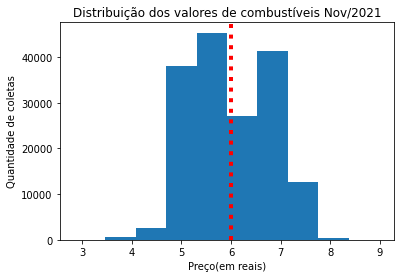

In [32]:
#Importar biblioteca matplotlib para plotagem dos gráficos
import matplotlib.pyplot as plt
plt.hist(combustíveis_df['Valor de Venda'])

#Adicionando título
plt.title('Distribuição dos valores de combustíveis Nov/2021')

#Adicionar rótulo de eixo horizontal
plt.xlabel('Preço(em reais)')

#Adicionar rótulo de eixo vertical
plt.ylabel('Quantidade de coletas')

#Adicionar linha para demonstrar a média
plt.axvline(combustíveis_df['Valor de Venda'] . mean(), color = 'red', linestyle = ':', linewidth = 4)

#Plotar gráfico
plt.show()

In [35]:
#Achando as médias do valor de venda para cada produto
c_mean = combustíveis_df['Valor de Venda'].groupby(by=combustíveis_df['Produto']).mean()
display(c_mean)

Produto
DIESEL                5.375682
DIESEL S10            5.454901
ETANOL                5.456115
GASOLINA              6.708741
GASOLINA ADITIVADA    6.860422
GNV                   4.392935
Name: Valor de Venda, dtype: float64

NameError: ignored

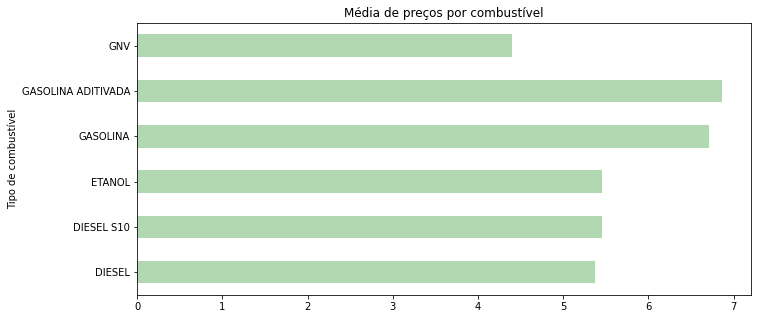

In [65]:
#Importando biblioteca seaborn
import seaborn as sns

#Definindo a área de um novo gráfico
plt.figure(figsize = (11,5))
c_mean.plot(
    kind = "barh",
    xlabel = "Tipo de combustível",
    ylabel = "Preco em reais/litro",
    title="Média de preços por combustível",
    color = "green",
    alpha = 0.3)

#Grid
plt.grid()

#Remover as bordas do gráfico
sns.despine()

#Resultado
plt.show()